In [ ]:

print(top_indices[0])
ls=[]
for ind in top_indices[0]:
    ls.append(text[ind])
print(ls)

In [ ]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# 加载预训练的BLIP模型和处理器
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")

# 打开图像文件
image = Image.open("/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1003.jpg")

# 处理图像
inputs = processor(images=image, return_tensors="pt")

# 生成输出
outputs = model.generate(**inputs, max_length=200, num_beams=10)
print(outputs.size())
# 解码输出
story = processor.decode(outputs[0], skip_special_tokens=True)
print(story)

In [ ]:
import os
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
path="/kaggle/input/animals10/raw-img"
kk=[]
for root,dir,name in  os.walk(path):
    if(len(dir)==0):
        label=root.split("/")[-1]
        label=translate[label]
        print(label)
        for na in name:
            tp_path=os.path.join(root,na)
            print(tp_path)
            kk.append(tp_path)
        
        


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms


class MyDataset(Dataset):
    def __init__(self, ):
        translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",\
  "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",\
"scoiattolo": "squirrel",  "cavallo": "horse",\
  "farfalla":"butterfly",
  "ragno":"spider", }
        path="/kaggle/input/animals10/raw-img"
        kk=[]
        labels=[]
        for root,dir,name in  os.walk(path):
            if(len(dir)==0):
                label=root.split("/")[-1]
                label=translate[label]
                for na in name:
                    tp_path=os.path.join(root,na)
                    kk.append(tp_path)
                    labels.append(label)

        self.path= kk
        self.labels = labels
        
    def __len__(self):
        return len(self.path)

    def __getitem__(self, idx):
        tp_path = self.path[idx]
        image=Image.open(tp_path)
        transform_to_tensor = transforms.ToTensor()

        image = transform_to_tensor(image)
        label = self.labels[idx]
        return image, label
my_dataset = MyDataset()
dataloader = DataLoader(my_dataset, batch_size=1, shuffle=True)
for i,(image, label) in enumerate(dataloader):
    if(i<5):
        transform_to_pil = transforms.ToPILImage()
        image=image.squeeze(0)
        image = transform_to_pil(image)
        display(image)
        print(label)
    


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

2024-06-22 09:43:02.007799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 09:43:02.007938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 09:43:02.145578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

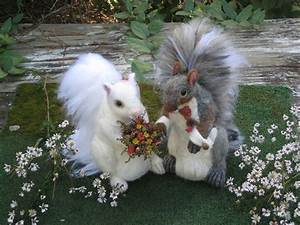

('squirrel',)
squirrel


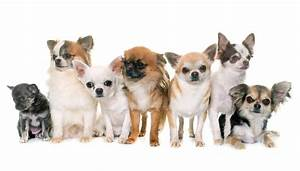

('dog',)
dog


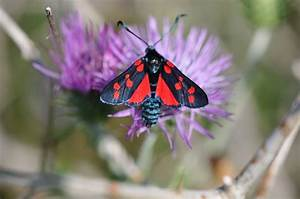

('butterfly',)
butterfly


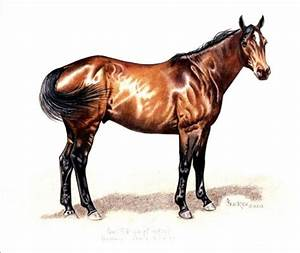

('horse',)
horse


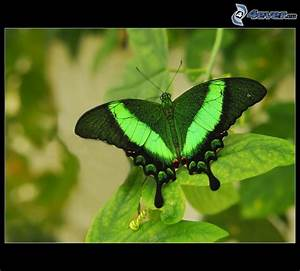

('butterfly',)
butterfly


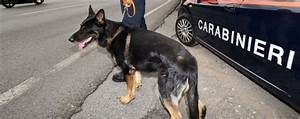

('dog',)
dog


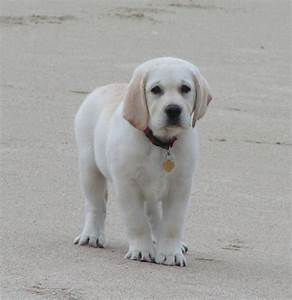

('dog',)
dog


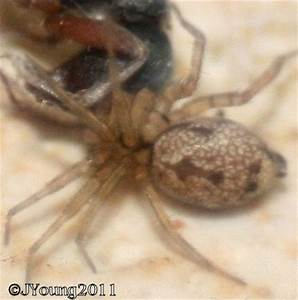

('spider',)
spider


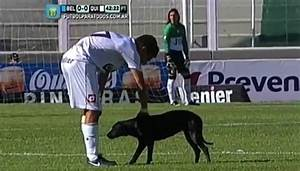

('dog',)
dog


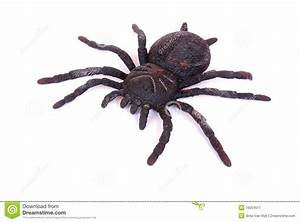

('spider',)
spider


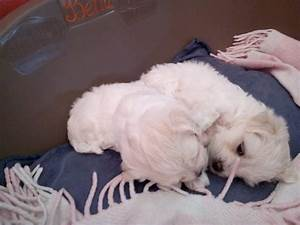

('dog',)
dog


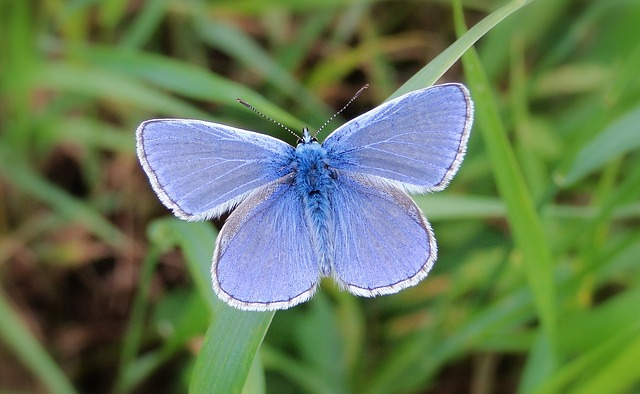

('butterfly',)
butterfly


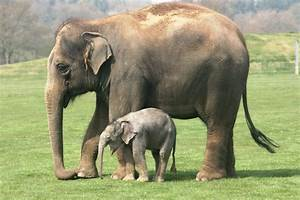

('elephant',)
elephant


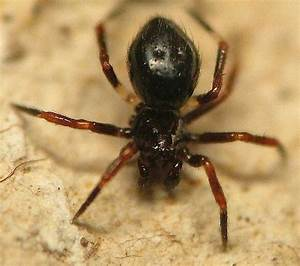

('spider',)
spider


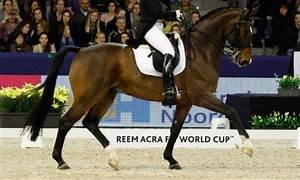

('horse',)
horse


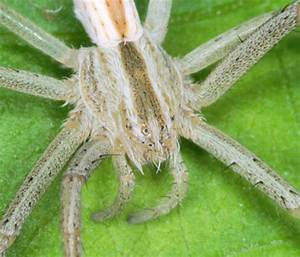

('spider',)
spider


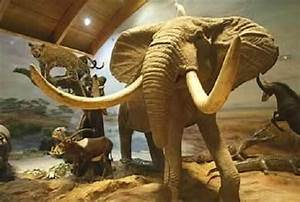

('elephant',)
elephant


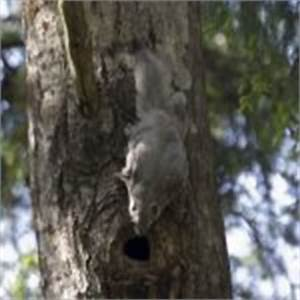

('squirrel',)
squirrel


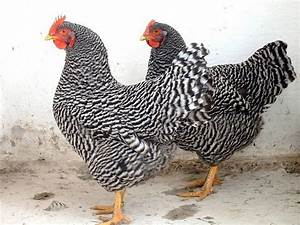

('chicken',)
chicken


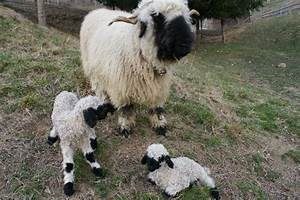

('sheep',)
sheep



KeyboardInterrupt



In [9]:
import torch
from PIL import Image
import requests
import tqdm.notebook as tqdm
from transformers import CLIPProcessor, CLIPModel
translate = {"cane": "dog", "cavallo": "horse",
             "elefante": "elephant", "farfalla": "butterfly",\
  "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",\
"scoiattolo": "squirrel",\
  "ragno":"spider", }
text=list(translate.values())

"""
with open("/kaggle/input/nlp-project-data/class.txt","r") as f:
    con=f.read()
    text=con.split("\n")
"""

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
transform_to_pil = transforms.ToPILImage()

for i,(image, label) in enumerate(dataloader):

    if(i<20):
        image=image.squeeze(0)
        image = transform_to_pil(image)

        inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

        outputs = model(**inputs)

        logits_per_image = outputs.logits_per_image 
        probs = logits_per_image.softmax(dim=1) 
        top_probs, top_indices = torch.topk(probs, 1)
        
        display(image)
        print(label)
        print(text[top_indices])